<a href="https://colab.research.google.com/github/MatthewC00273575/Data-Science/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np

# Mock dataset (replace with real CSV if you have one)
data = pd.DataFrame({
    'a': np.random.randint(0, 101, 5000),
    'b': np.random.randint(0, 101, 5000)
})
data['c'] = data['a'] + data['b']
data.to_csv('number_triplets.csv', index=False)

# Load
df = pd.read_csv('number_triplets.csv')
print(df.head())

    a   b    c
0  35   9   44
1  11  33   44
2  31  83  114
3  82  80  162
4  48  17   65


In [142]:
# Update vocab size and sequence length
vocab_size = 101  # Digits 0-100

def number_to_sequence(num):
    return [int(d) for d in str(num).zfill(3)]  # Pad to 3 digits, e.g., 45 -> [0, 4, 5]

X = np.array([number_to_sequence(a) + number_to_sequence(b) for a, b in zip(df['a'], df['b'])])  # [a1, a2, a3, b1, b2, b3]
y = np.array([number_to_sequence(c) for c in df['c']])  # [c1, c2, c3]

# One-hot encode
X_onehot = np.array([np.eye(vocab_size)[x] for x in X])  # Shape: (5000, 6, 101)
y_onehot = np.array([np.eye(vocab_size)[y_i] for y_i in y])  # Shape: (5000, 3, 101)

print(f"X shape: {X_onehot.shape}, y shape: {y_onehot.shape}")

X shape: (5000, 6, 101), y shape: (5000, 3, 101)


In [203]:
import tensorflow as tf
from tensorflow.keras import layers, models

# RNN model for 3-digit output
model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(6, vocab_size), return_sequences=False),  # 6 timesteps, more units
    layers.Dense(3 * vocab_size, activation='softmax'),  # Predict 3 digits
    layers.Reshape((3, vocab_size))  # Output: (batch, 3, 101)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train (fewer epochs, larger data)
history = model.fit(X_onehot, y_onehot, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_52 (SimpleRNN)            │ (None, 64)                  │          10,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 303)                 │          19,695 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_33 (Reshape)                 │ (None, 3, 101)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,319 (118.43 KB)

 Trainable params: 30,319 (118.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1906 - loss: 3.1112 - val_accuracy: 0.2227 - val_loss: 1.7917
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2368 - loss: 1.7831 - val_accuracy: 0.2270 - val_loss: 1.7787
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2477 - loss: 1.7765 - val_accuracy: 0.2320 - val_loss: 1.7736
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2565 - loss: 1.7710 - val_accuracy: 0.3223 - val_loss: 1.7374
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3325 - loss: 1.7149 - val_accuracy: 0.3647 - val_loss: 1.6744
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3581 - loss: 1.6678 - val_accuracy: 0.3723 - val_loss: 1.6336
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3777 - loss: 1.6301 - val_accuracy: 0.3860 - val_loss: 1.6269
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3925 - loss: 1.6062 - val_accuracy: 

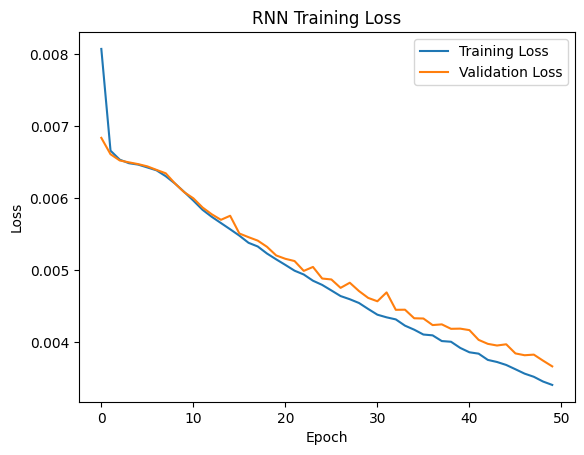

In [206]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('RNN Training Loss')
plt.legend()
plt.show()

In [221]:
# Prediction function
def predict_sum(a, b):
    seq = number_to_sequence(a) + number_to_sequence(b)
    x = np.eye(vocab_size)[seq][np.newaxis, ...]  # Shape: (1, 4, 10)
    pred = model.predict(x, verbose=0)
    digits = [np.argmax(d) for d in pred[0]]
    return int(''.join(map(str, digits)))

# Test
print(f"45 + 67 = {predict_sum(45, 67)}")

45 + 67 = 105


In [232]:
# Using Relu
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(6, vocab_size), return_sequences=False),
    layers.Dense(3 * vocab_size, activation='relu'),  # ReLU
    layers.Reshape((3, vocab_size))
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

history = model.fit(X_onehot, y_onehot, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_60 (SimpleRNN)            │ (None, 64)                  │          10,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 303)                 │          19,695 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_41 (Reshape)                 │ (None, 3, 101)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,319 (118.43 KB)

 Trainable params: 30,319 (118.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2234 - loss: 0.0100 - val_accuracy: 0.3927 - val_loss: 0.0068
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4023 - loss: 0.0067 - val_accuracy: 0.3967 - val_loss: 0.0066
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4176 - loss: 0.0065 - val_accuracy: 0.3910 - val_loss: 0.0066
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4218 - loss: 0.0065 - val_accuracy: 0.4133 - val_loss: 0.0065
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4302 - loss: 0.0064 - val_accuracy: 0.4133 - val_loss: 0.0064
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4346 - loss: 0.0064 - val_accuracy: 0.4130 - val_loss: 0.0064
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4393 - loss: 0.0063 - val_accuracy: 0.4057 - val_loss: 0.0064
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4436 - loss: 0.0063 - val_accu

In [233]:
# Prediction function
def predict_sum(a, b):
    seq = number_to_sequence(a) + number_to_sequence(b)
    x = np.eye(vocab_size)[seq][np.newaxis, ...]  # Shape: (1, 4, 10)
    pred = model.predict(x, verbose=0)
    digits = [np.argmax(d) for d in pred[0]]
    return int(''.join(map(str, digits)))

# Test
print(f"45 + 67 = {predict_sum(45, 67)}")

45 + 67 = 112


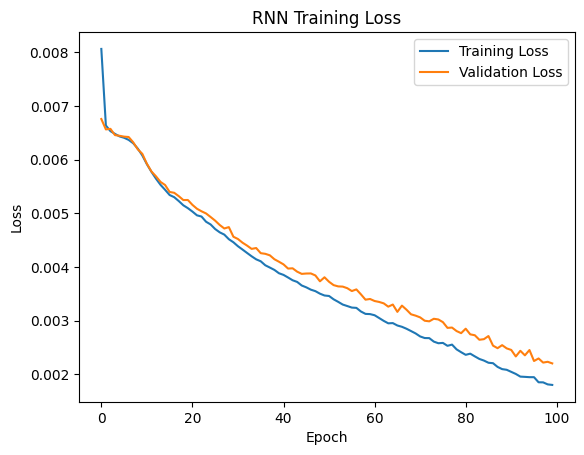

In [234]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('RNN Training Loss')
plt.legend()
plt.show()

In [217]:
#Using Sigmoid
model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(6, vocab_size), return_sequences=False),
    layers.Dense(3 * vocab_size, activation='sigmoid'),  # Sigmoid (0 to 1)
    layers.Reshape((3, vocab_size))
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

history = model.fit(X_onehot, y_onehot, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_54 (SimpleRNN)            │ (None, 64)                  │          10,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 303)                 │          19,695 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_35 (Reshape)                 │ (None, 3, 101)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,319 (118.43 KB)

 Trainable params: 30,319 (118.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1260 - loss: 0.1139 - val_accuracy: 0.2663 - val_loss: 0.0086
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2513 - loss: 0.0083 - val_accuracy: 0.2493 - val_loss: 0.0079
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2466 - loss: 0.0079 - val_accuracy: 0.2917 - val_loss: 0.0078
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2474 - loss: 0.0078 - val_accuracy: 0.2243 - val_loss: 0.0077
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2546 - loss: 0.0077 - val_accuracy: 0.3180 - val_loss: 0.0076
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3212 - loss: 0.0076 - val_accuracy: 0.3457 - val_loss: 0.0072
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3307 - loss: 0.0072 - val_accuracy: 0.3467 - val_loss: 0.0070
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3506 - loss: 0.0070 - val_accuracy: 0

In [223]:
# Prediction function
def predict_sum(a, b):
    seq = number_to_sequence(a) + number_to_sequence(b)
    x = np.eye(vocab_size)[seq][np.newaxis, ...]  # Shape: (1, 4, 10)
    pred = model.predict(x, verbose=0)
    digits = [np.argmax(d) for d in pred[0]]
    return int(''.join(map(str, digits)))

# Test
print(f"45 + 67 = {predict_sum(45, 67)}")

45 + 67 = 105


In [225]:
#using tanh
model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(6, vocab_size), return_sequences=False),
    layers.Dense(3 * vocab_size, activation='tanh'),  # Tanh (-1 to 1)
    layers.Reshape((3, vocab_size))
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

history = model.fit(X_onehot, y_onehot, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_56 (SimpleRNN)            │ (None, 64)                  │          10,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 303)                 │          19,695 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_37 (Reshape)                 │ (None, 3, 101)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,319 (118.43 KB)

 Trainable params: 30,319 (118.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1756 - loss: 0.0144 - val_accuracy: 0.3377 - val_loss: 0.0077
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3474 - loss: 0.0075 - val_accuracy: 0.3777 - val_loss: 0.0067
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3807 - loss: 0.0067 - val_accuracy: 0.3850 - val_loss: 0.0066
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3970 - loss: 0.0066 - val_accuracy: 0.3923 - val_loss: 0.0066
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4016 - loss: 0.0066 - val_accuracy: 0.3873 - val_loss: 0.0066
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4089 - loss: 0.0066 - val_accuracy: 0.3977 - val_loss: 0.0066
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4158 - loss: 0.0065 - val_accuracy: 0.3983 - val_loss: 0.0065
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4102 - loss: 0.0066 - val_accuracy: 0.

In [226]:
# Prediction function
def predict_sum(a, b):
    seq = number_to_sequence(a) + number_to_sequence(b)
    x = np.eye(vocab_size)[seq][np.newaxis, ...]  # Shape: (1, 4, 10)
    pred = model.predict(x, verbose=0)
    digits = [np.argmax(d) for d in pred[0]]
    return int(''.join(map(str, digits)))

# Test
print(f"45 + 67 = {predict_sum(45, 67)}")

45 + 67 = 101


In [230]:

#using linear
model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(6, vocab_size), return_sequences=False),
    layers.Dense(3 * vocab_size, activation='linear'),  # Linear (raw values)
    layers.Reshape((3, vocab_size))
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

history = model.fit(X_onehot, y_onehot, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_59 (SimpleRNN)            │ (None, 64)                  │          10,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 303)                 │          19,695 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_40 (Reshape)                 │ (None, 3, 101)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,319 (118.43 KB)

 Trainable params: 30,319 (118.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1843 - loss: 0.0142 - val_accuracy: 0.3417 - val_loss: 0.0074
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3615 - loss: 0.0071 - val_accuracy: 0.3830 - val_loss: 0.0066
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3966 - loss: 0.0066 - val_accuracy: 0.3867 - val_loss: 0.0066
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4043 - loss: 0.0065 - val_accuracy: 0.3930 - val_loss: 0.0065
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4039 - loss: 0.0065 - val_accuracy: 0.4040 - val_loss: 0.0065
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4058 - loss: 0.0065 - val_accuracy: 0.3940 - val_loss: 0.0065
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4071 - loss: 0.0065 - val_accuracy: 0.3977 - val_loss: 0.0065
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4061 - loss: 0.0065 - val_accuracy: 0.

In [231]:
# Prediction function
def predict_sum(a, b):
    seq = number_to_sequence(a) + number_to_sequence(b)
    x = np.eye(vocab_size)[seq][np.newaxis, ...]  # Shape: (1, 4, 10)
    pred = model.predict(x, verbose=0)
    digits = [np.argmax(d) for d in pred[0]]
    return int(''.join(map(str, digits)))

# Test
print(f"45 + 67 = {predict_sum(45, 67)}")

45 + 67 = 102
